In [4]:
import pandas as pd

Happy = pd.read_csv("http://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\s+")
rowlabel = ["Married", "Divorced/Separated", "Never married"]
collabel = ["Very happy", "Pretty happy", "Not too happy"]

table = pd.crosstab(Happy["marital"], Happy["happiness"], margins=False)
table.index = rowlabel
table.columns = collabel
table

,Very happy,Pretty happy,Not too happy
Married,432,504,61
Divorced/Separated,92,282,103
Never married,124,409,135


In [5]:
# conditional distributions on happiness (proportions within rows):
proptable = pd.crosstab(Happy["marital"], Happy["happiness"], normalize="index")
proptable.index = rowlabel
proptable.columns = collabel
proptable

,Very happy,Pretty happy,Not too happy
Married,0.433300,0.505517,0.061184
Divorced/Separated,0.192872,0.591195,0.215933
Never married,0.185629,0.612275,0.202096


In [6]:
import statsmodels.api as sm  # expected frequencies under H0: independence

table = sm.stats.Table(table)
print(table.fittedvalues)

                    Very happy  Pretty happy  Not too happy
Married             301.613445    556.216153     139.170401
Divorced/Separated  144.302521    266.113445      66.584034
Never married       202.084034    372.670401      93.245565


In [7]:
X2 = table.test_nominal_association()  # chi-squared test of independence
print(X2)

df          4
pvalue      0.0
statistic   197.407019249992


In [8]:
table.standardized_resids

,Very happy,Pretty happy,Not too happy
Married,12.295576,-4.554333,-9.770639
Divorced/Separated,-5.913202,1.661245,5.457032
Never married,-7.928512,3.411881,5.619486


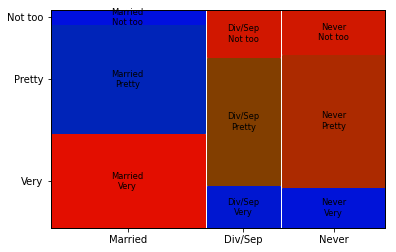

In [10]:
Happy.loc[Happy["happiness"] == 1, "happiness"] = "Very"
Happy.loc[Happy["happiness"] == 2, "happiness"] = "Pretty"
Happy.loc[Happy["happiness"] == 3, "happiness"] = "Not too"
Happy.loc[Happy["marital"] == 1, "marital"] = "Married"
Happy.loc[Happy["marital"] == 2, "marital"] = "Div/Sep"
Happy.loc[Happy["marital"] == 3, "marital"] = "Never"

from statsmodels.graphics.mosaicplot import mosaic

fig, _ = mosaic(Happy, ["marital", "happiness"], statistic=True)